Importing necessary libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Load the dataset
df = pd.read_csv("Iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
 df = df.drop("Id", axis =1)

In [6]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#Display the number of samples for each species
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
# Convert class labels into numerical form
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df["Species"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

# Visualization

In [10]:
species_colors = {0: 'red', 1: 'green', 2: 'blue'}

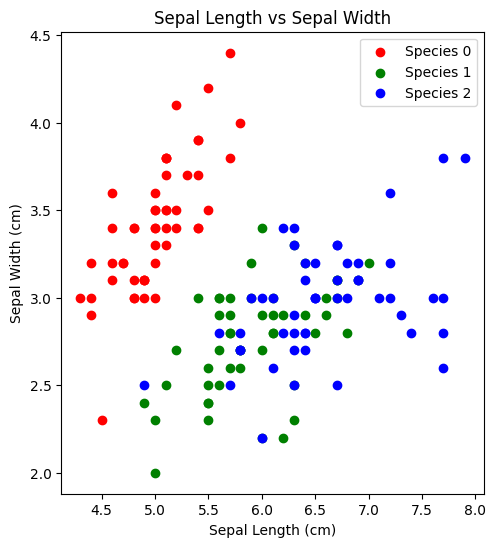

In [11]:
# Scatter plots for Sepal Length vs Sepal Width
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for species, color in species_colors.items():
    subset = df[df['Species'] == species]
    plt.scatter(subset['SepalLengthCm'], subset['SepalWidthCm'], label=f'Species {species}', color=color)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()

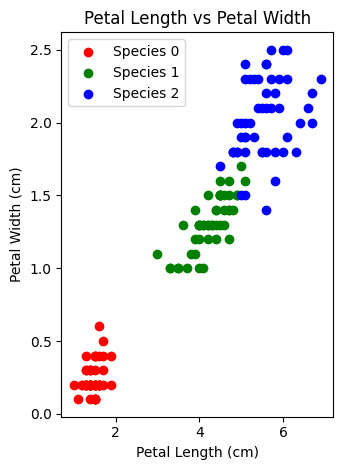

In [12]:
# Scatter plots for Petal Length vs Petal Width
plt.subplot(1, 2, 2)
for species, color in species_colors.items():
    subset = df[df['Species'] == species]
    plt.scatter(subset['PetalLengthCm'], subset['PetalWidthCm'], label=f'Species {species}', color=color)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.legend()

plt.tight_layout()
plt.show()

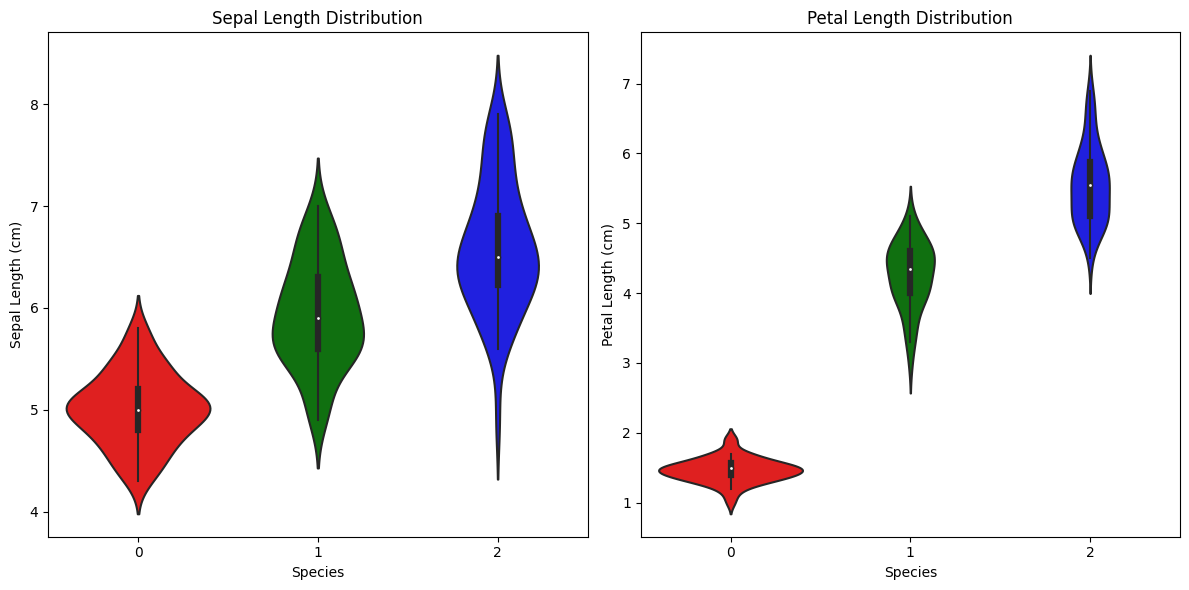

In [13]:
# Violin plots for feature distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='Species', y='SepalLengthCm', data=df, palette=species_colors)
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.title('Sepal Length Distribution')

plt.subplot(1, 2, 2)
sns.violinplot(x='Species', y='PetalLengthCm', data=df, palette=species_colors)
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.title('Petal Length Distribution')

plt.tight_layout()
plt.show()

<AxesSubplot: >

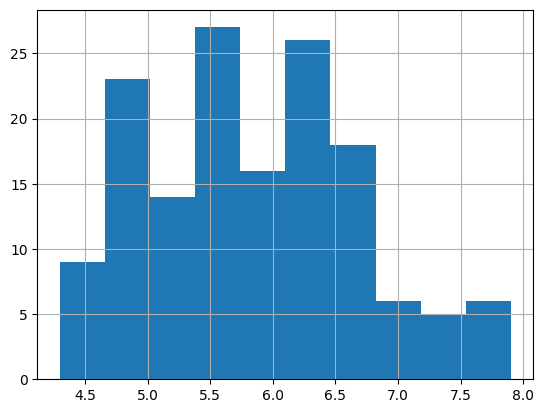

In [15]:
# Plotting histogram for each feature
df['SepalLengthCm'].hist()

<AxesSubplot: >

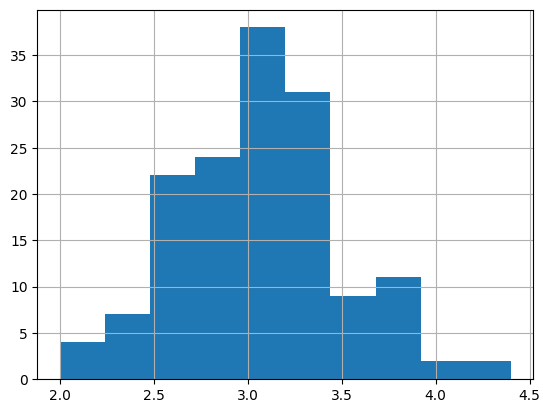

In [16]:
df['SepalWidthCm'].hist()

<AxesSubplot: >

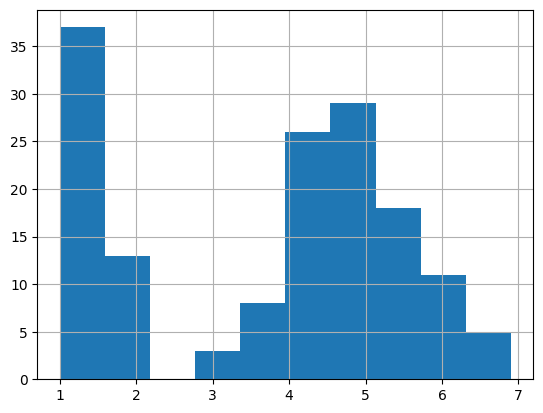

In [17]:
df['PetalLengthCm'].hist()

<AxesSubplot: >

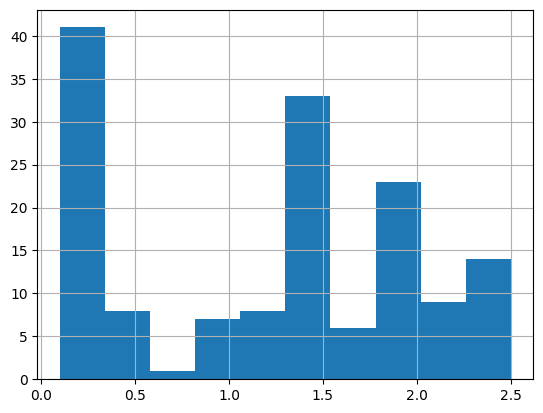

In [18]:
df['PetalWidthCm'].hist()


<AxesSubplot: >

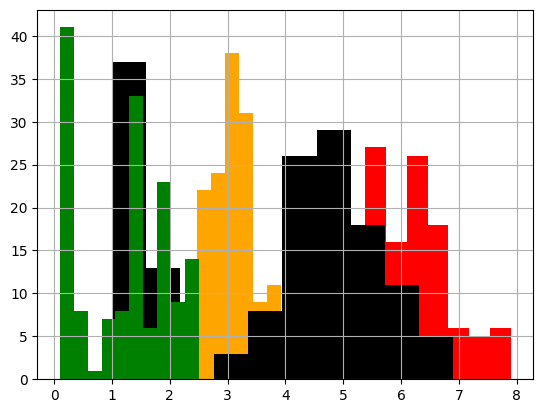

In [19]:
#Plotting histogram for all the features together
df['SepalLengthCm'].hist(color='red')
df['SepalWidthCm'].hist(color='orange')
df['PetalLengthCm'].hist(color='black')
df['PetalWidthCm'].hist(color='green')

In [20]:
# Finding the correlation matrix
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


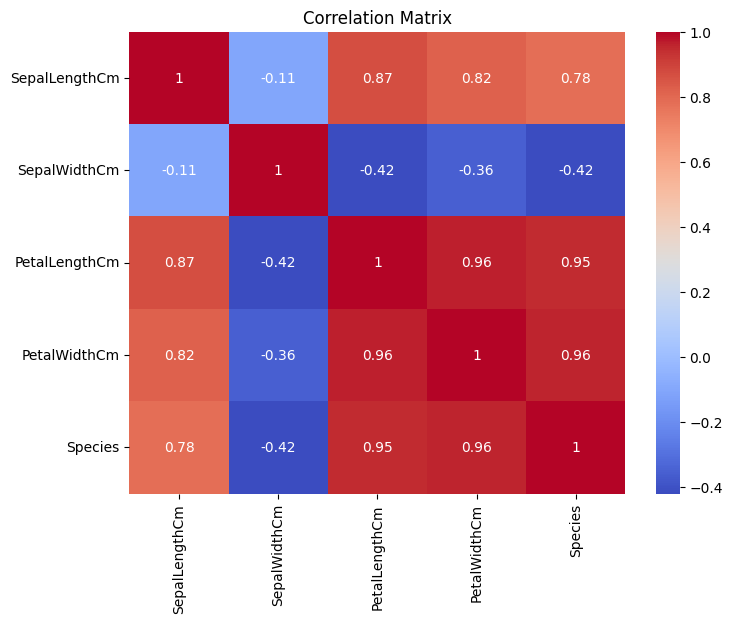

In [21]:
# Correlation matrix and heatmap
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Model Training

In [22]:
# Splitting the data into features (X) and target (y)
X = df.drop('Species', axis=1)
y = df["Species"]
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [23]:
# Model 1: Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Create and train the Logistic Regression model with increased max_iter
model1 = LogisticRegression(max_iter=1000)  # Increase max_iter to an appropriate value
model1.fit(X_train_scaled, y_train)

# Step 3: Make predictions and calculate accuracy
y_pred1 = model1.predict(X_test_scaled)
accuracy1 = accuracy_score(y_test, y_pred1)
print("Accuracy (Logistic Regression): {:.2f}%".format(accuracy1 * 100))

Accuracy (Logistic Regression): 95.56%


In [24]:
# Model 2: K-nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy (KNN): {:.2f}%".format(accuracy2 * 100))

Accuracy (KNN): 97.78%


In [25]:
# Model 3: Decision Tree
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy (Decision Tree): {:.2f}%".format(accuracy3 * 100))

Accuracy (Decision Tree): 95.56%


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Create your machine learning models
model1 = LogisticRegression(max_iter=1000)  # Increased max_iter
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier()
best_rf = RandomForestClassifier()

# List of models
models = [model1, model2, model3]
model_names = ["Logistic Regression", "KNN", "Decision Tree"]

# Perform cross-validation and print results
for i, model in enumerate(models):
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f"{model_names[i]} - Cross-Validation Accuracy: {np.mean(cv_scores):.2f}%")

Logistic Regression - Cross-Validation Accuracy: 0.97%
KNN - Cross-Validation Accuracy: 0.97%
Decision Tree - Cross-Validation Accuracy: 0.96%


# Logistic regression and KNN has the good accuracy

In [30]:
y_pred1 , y_pred2

(array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
        1]),
 array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
        1]))